<a href="https://colab.research.google.com/github/2303A51941/ADM-27/blob/main/Lab6_scores_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("scores.csv")
data.sample(5)

,Emotional_Quotient,Intelligence_Quotient,Marks
73,69,120,74
42,69,161,74
61,69,170,74
19,72,130,77
79,92,170,99


In [5]:

data.describe()
data.shape

(80, 3)

<Axes: xlabel='Emotional_Quotient', ylabel='Count'>

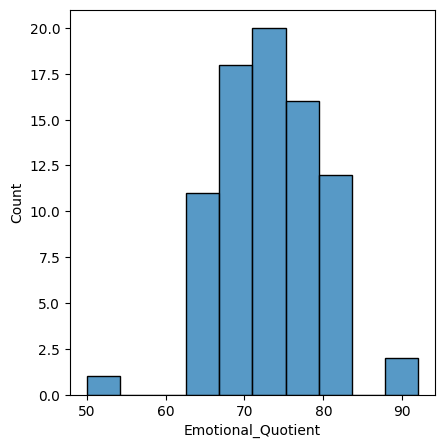

In [6]:

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(data['Emotional_Quotient'])


<Axes: xlabel='Intelligence_Quotient', ylabel='Count'>

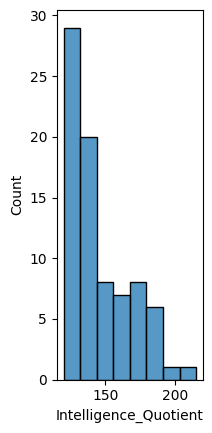

In [7]:
plt.subplot(1,3,2)
sns.histplot(data['Intelligence_Quotient'])


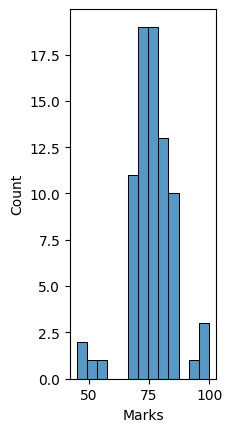

In [8]:
plt.subplot(1,3,3)
sns.histplot(data['Marks'])
plt.show()

In [9]:
z_score_upper_limit=data['Emotional_Quotient'].mean()+3*data['Emotional_Quotient'].std()
z_score_lower_limit=data['Emotional_Quotient'].mean()-3*data['Emotional_Quotient'].std()
z_score_upper_limit
z_score_lower_limit

53.108946316436615

In [10]:
data["Emotional_Quotient"]=np.where(
    data["Emotional_Quotient"]>z_score_upper_limit,
    z_score_upper_limit,np.where(
        data["Emotional_Quotient"]<z_score_lower_limit,
        z_score_lower_limit,
        data["Emotional_Quotient"]
        )
    )
data.describe()


,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.163862,145.262500,76.062500
std,6.543434,21.560479,9.195959
min,53.108946,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


<Axes: ylabel='Emotional_Quotient'>

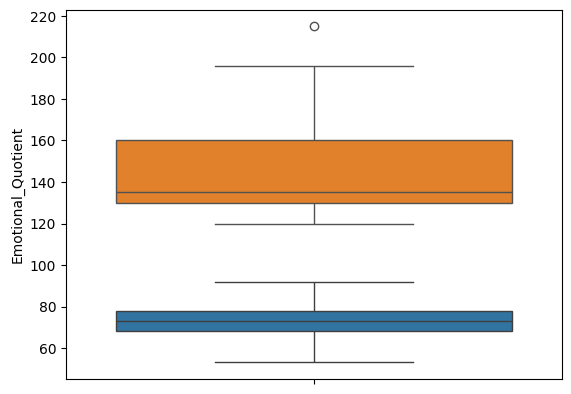

In [11]:

sns.boxplot(data["Emotional_Quotient"])
data["Intelligence_Quotient"].skew()
sns.boxplot(data["Intelligence_Quotient"])

In [12]:

percentile25=data["Intelligence_Quotient"].quantile(0.25)
percentile75=data["Intelligence_Quotient"].quantile(0.75)

In [13]:
percentile75
iqr=percentile75 - percentile25
iqr

30.25

In [14]:
iqr_upper_limit=percentile75 + 1.5*iqr
iqr_lower_limit=percentile25 - 1.5*iqr

In [15]:
print("Upper limit"),iqr_upper_limit
print("Lower limit",iqr_lower_limit)

Upper limit
Lower limit 84.625


<Axes: ylabel='Intelligence_Quotient'>

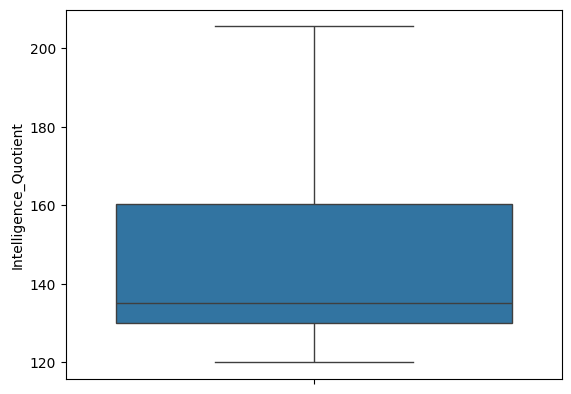

In [17]:
data[data["Intelligence_Quotient"]>iqr_upper_limit]
data[data["Intelligence_Quotient"]<iqr_lower_limit]
data["Intelligence_Quotient"]=np.where(
    data["Intelligence_Quotient"]>iqr_upper_limit,
    iqr_upper_limit,
    np.where(data["Intelligence_Quotient"]<iqr_lower_limit,
    iqr_lower_limit,
    data["Intelligence_Quotient"]
             ))
data.describe()
sns.boxplot(data['Intelligence_Quotient'])
